In [5]:
import requests
from config import OMDB_API_KEY
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
MOVIE_NAME = ["The+Hunger+Games", "Twilight", "parasite", "The+Twilight+Saga%3A+New+Moon", "3+Idiots", "Up", "Ratatouille", "Forrest+Gump", "Titanic", "The+Social+Network", 
              "Matrix", "Inception", "The+Shawshank+Redemption", "Interstellar", "The+Green+Mile", "Dog", "Morbius+", "Babylon", "Ambulance+", "The+Marvels", "Oppenheimer", 
              "Barbie", "Elemental", "The+Flash", "Fast", "Cocaine+Bear", "Halloween+Ends", "The+Lost+City"]

In [8]:
def get_movie(response):
    all_data = []

    for item in response:
        data = {'Title': response['Title'],
                'Year': response['Year'],
                'Realeased':response['Released'],
                'Run Time': response['Runtime'],
                'Movie Type': response['Genre'],
                'Actors': response['Actors'],
                'Language': response['Language'],
                'Country': response['Country'],
                'Ratings': response['Ratings'][0]['Value'],
                'IMDB Rating': response['imdbRating'],
                'IMDB Votes': response['imdbVotes']
        }
    all_data.append(data)
    return pd.DataFrame(all_data)

def to_dataframe():
    all_url = []
    for movie in MOVIE_NAME:
        url_base = "http://www.omdbapi.com/?t=" + movie + "&plot=full&apikey=" + OMDB_API_KEY
        all_url.append(url_base)

    df = pd.DataFrame()
    for url in all_url:
        response = requests.get(url).json()
        df_movie = get_movie(response)
        df = pd.concat([df,df_movie])
    return df
    

In [9]:
df = to_dataframe()
df

,Title,Year,Realeased,Run Time,Movie Type,Actors,Language,Country,Ratings,IMDB Rating,IMDB Votes
0,The Hunger Games,2012,23 Mar 2012,142 min,"Action, Adventure, Sci-Fi","Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",English,United States,7.2/10,7.2,"977,817"
0,Twilight,2008,21 Nov 2008,122 min,"Drama, Fantasy, Romance","Kristen Stewart, Robert Pattinson, Billy Burke",English,United States,5.3/10,5.3,"480,516"
0,Parasite,2019,08 Nov 2019,132 min,"Drama, Thriller","Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong","Korean, English",South Korea,8.5/10,8.5,"907,374"
0,The Twilight Saga: New Moon,2009,20 Nov 2009,130 min,"Adventure, Drama, Fantasy","Kristen Stewart, Robert Pattinson, Taylor Lautner","English, Italian",United States,4.8/10,4.8,"295,990"
0,3 Idiots,2009,25 Dec 2009,170 min,"Comedy, Drama","Aamir Khan, Madhavan, Mona Singh","Hindi, English",India,8.4/10,8.4,"422,993"
0,Up,2009,29 May 2009,96 min,"Animation, Adventure, Comedy","Edward Asner, Jordan Nagai, John Ratzenberger",English,"United States, Japan",8.3/10,8.3,"1,100,008"
0,Ratatouille,2007,27 Jun 2007,111 min,"Animation, Adventure, Comedy","Brad Garrett, Lou Romano, Patton Oswalt","English, French",United States,8.1/10,8.1,"799,510"
0,Forrest Gump,1994,06 Jul 1994,142 min,"Drama, Romance","Tom Hanks, Robin Wright, Gary Sinise",English,United States,8.8/10,8.8,"2,203,270"
0,Titanic,1997,19 Dec 1997,194 min,"Drama, Romance","Leonardo DiCaprio, Kate Winslet, Billy Zane","English, Swedish, Italian, French","United States, Mexico",7.9/10,7.9,"1,256,049"
0,The Social Network,2010,01 Oct 2010,120 min,"Biography, Drama","Jesse Eisenberg, Andrew Garfield, Justin Timbe...","English, French",United States,7.8/10,7.8,"744,597"


In [10]:
data = df.copy()

In [11]:
data.sample(3)

,Title,Year,Realeased,Run Time,Movie Type,Actors,Language,Country,Ratings,IMDB Rating,IMDB Votes
0,Forrest Gump,1994,06 Jul 1994,142 min,"Drama, Romance","Tom Hanks, Robin Wright, Gary Sinise",English,United States,8.8/10,8.8,"2,203,270"
0,The Shawshank Redemption,1994,14 Oct 1994,142 min,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton",English,United States,9.3/10,9.3,"2,824,159"
0,The Green Mile,1999,10 Dec 1999,189 min,"Crime, Drama, Fantasy","Tom Hanks, Michael Clarke Duncan, David Morse","English, French",United States,8.6/10,8.6,"1,375,738"


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0 to 0
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        28 non-null     object
 1   Year         28 non-null     object
 2   Realeased    28 non-null     object
 3   Run Time     28 non-null     object
 4   Movie Type   28 non-null     object
 5   Actors       28 non-null     object
 6   Language     28 non-null     object
 7   Country      28 non-null     object
 8   Ratings      28 non-null     object
 9   IMDB Rating  28 non-null     object
 10  IMDB Votes   28 non-null     object
dtypes: object(11)
memory usage: 2.6+ KB


ValueError: could not convert string to float: '2014–2023'

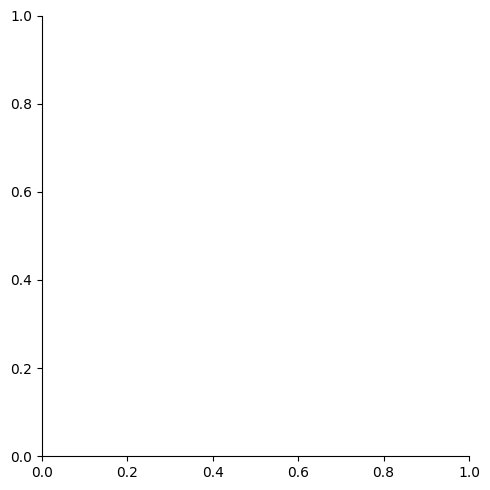

In [23]:
sns.lmplot(x='Year', y='IMDB Votes', data=data)

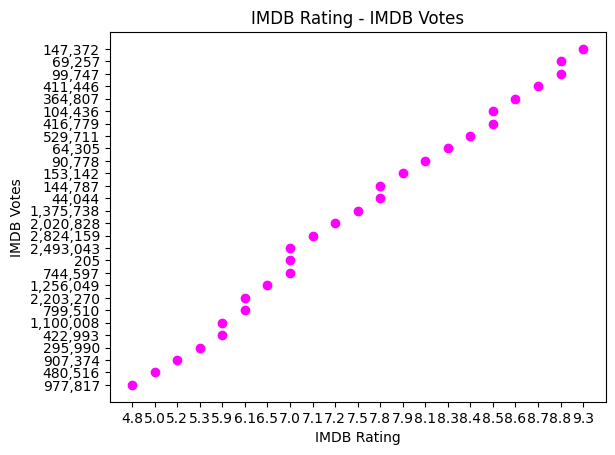

In [21]:
plt.scatter(data["IMDB Rating"].sort_values(), data["IMDB Votes"], color="magenta")
plt.title("IMDB Rating - IMDB Votes")
plt.xlabel("IMDB Rating")
plt.ylabel("IMDB Votes")
plt.show()

Text(0.5, 1.0, 'Count for sleep disorder')

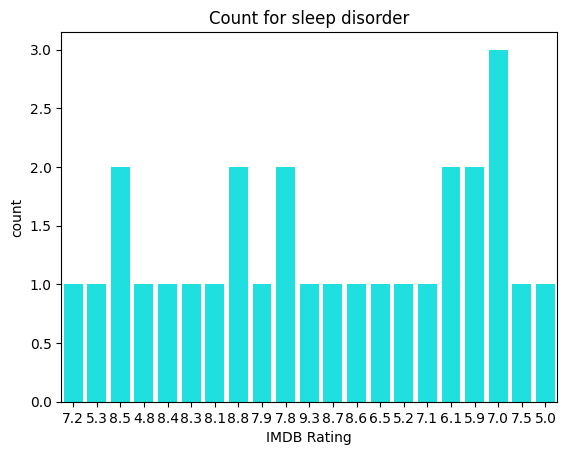

In [13]:
sns.countplot(x="IMDB Rating", data=data, color="cyan")
plt.title('Count for sleep disorder')